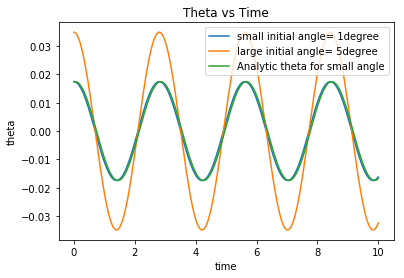

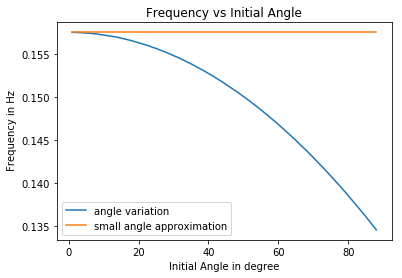

In [186]:
# Problem1: Simple Pendulum
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Define a function with variables
def pendulum(L,g,thetaini):
    # Initial conditions
    t=0
    a1 = 0
    a2 = 0
    theta = np.deg2rad(thetaini)
    dt = 0.01
    a2_array = np.array([a2])
    t_array = np.array([t])
    theta_array = np.array([theta])
    for i in range(1000):
        a2 =  (-g/L) *np.sin(theta)
        a1 +=  a2* dt
        theta  +=  a1*dt
        t+=dt
        a2_array = np.append(a2_array,a2)
        t_array = np.append(t_array,t)
        theta_array = np.append(theta_array,theta)
    return [t_array, theta_array]


[t1,theta1] = pendulum(2,10,1)
[t2,theta2] = pendulum(2,10,2)
plt.plot(t1,theta1,label='small initial angle= 1degree')
plt.plot(t2,theta2,label='large initial angle= 5degree')
plt.title('Theta vs Time')
plt.legend()
plt.xlabel('time')
plt.ylabel('theta');

# Let us define analytic solution for small angle approximation
def pendulum1(A,w):
    t=0
    g=10
    l=2
    dt = 0.001
    Analytictheta=np.deg2rad(A)
    t_array = np.array([t])
    Analytictheta_array = np.array(Analytictheta)
    for i in range(1,10000):
        Analytictheta =np.deg2rad(A)* np.sin(np.sqrt(g/l)*t+np.deg2rad(85))
        # I have added some phase to make distinct in plot
        t+=dt
        t_array = np.append(t_array,t)
        Analytictheta_array = np.append(Analytictheta_array,Analytictheta)
    return [t_array, Analytictheta_array]

[t3,Analytictheta1]=pendulum1(1,3)
plt.plot(t3,Analytictheta1,label='Analytic theta for small angle')
plt.legend();


#Let us find frequency vs Maximum deflection angle

frequencies = []
def pendulum(thetaini):
    # Initial conditions
    g=9.8
    l=10
    t=np.linspace(0,10,10000)
    dt = 0.001
    theta=[0]*10000
    a1 = [0]*10000
    a2 = [0]*10000
    T = []
    theta[0] = np.deg2rad(thetaini)
    for i in range(1,10000):
        a2[i] =  (-1)*(g/l) *np.sin(theta[i-1])
        a1[i] =  a1[i-1]+ a2[i]* dt
        theta[i]  = theta[i-1] + a1[i]*dt
        # we define time period here
        if theta[i] <= 0 and theta[i-1] >= 0:
            T.append(t[i])    
    frequency=1/(T[1]-T[0])
    frequencies.append(frequency) 
for z in range(1,89):   
    pendulum(z)
plt.figure(2)
plt.plot(range(1,89),frequencies,label='angle variation')
plt.title('Frequency vs Initial Angle')
plt.xlabel('Initial Angle in degree')
plt.ylabel(' Frequency in Hz')
plt.legend();
    
#let us see the analytical solution for frequency in small angle approximation
# Initial conditions
l=10
g=9.8
frequencySmallangle=[1/(2*np.pi*np.sqrt(l/g))]*88

plt.plot(range(1,89),frequencySmallangle,label='small angle approximation')
plt.title('Frequency vs Initial Angle')
plt.xlabel('Initial Angle in degree')
plt.ylabel(' Frequency in Hz')
plt.legend();


As damping coeffient increases, theta decreases fast and dies off and also the frequency.


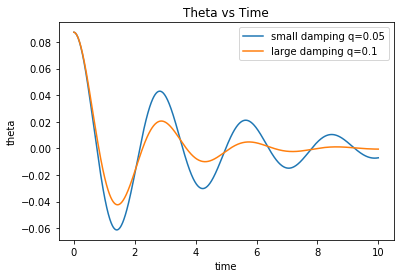

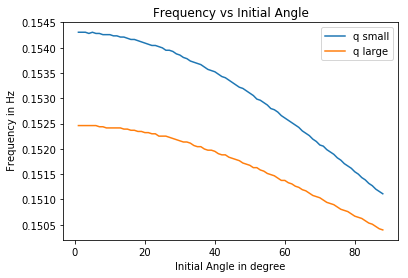

In [187]:
# Problem2: Damped Pendulum
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Define a function with variables
def pendulum(L,g,thetaini,q):
    # Initial conditions
    t=0
    a1 = 0
    a2 = 0
    theta = np.deg2rad(thetaini)
    dt = 0.01
    a2_array = np.array([a2])
    t_array = np.array([t])
    theta_array = np.array([theta])
    for i in range(1000):
        # Let us define damped pendulum
        a2 =  (-g/L) *np.sin(theta)-q*a1
        a1 +=  a2* dt
        theta  +=  a1*dt
        t+=dt
        a2_array = np.append(a2_array,a2)
        t_array = np.append(t_array,t)
        theta_array = np.append(theta_array,theta)
    return [t_array, theta_array]

[t1,theta1] = pendulum(2,10,5,0.5)
[t2,theta2] = pendulum(2,10,5,1)
plt.plot(t1,theta1,label='small damping q=0.05')
plt.plot(t2,theta2,label='large damping q=0.1')
plt.title('Theta vs Time')
plt.legend()
plt.xlabel('time')
plt.ylabel('theta');


#Let us find Frequency vs Maximum deflection angle

import numpy as np
import matplotlib.pyplot as plt

frequencies = []
def pendulum(thetaini,q):
    # Initial conditions
    g=9.8
    l=10
    t=np.linspace(0,10,10000)
    dt = 0.001
    theta=[0]*10000
    a1 = [0]*10000
    a2 = [0]*10000
    T = []
    theta[0] = np.deg2rad(thetaini)
    for i in range(1,10000):
        #Define Damped pendulum
        a2[i] =  (-1)*(g/l) *np.sin(theta[i-1])-q*a1[i-1]
        a1[i] =  a1[i-1]+ a2[i]* dt
        theta[i]  = theta[i-1] + a1[i]*dt
        # we define time period here
        if theta[i] <= 0 and theta[i-1] >= 0:
            T.append(t[i])    
    frequency=1/(T[1]-T[0])
    frequencies.append(frequency) 
for z in range(1,89):   
    pendulum(z,0.4)
plt.figure(2)
plt.plot(range(1,89),frequencies,label='q small')
plt.title('Frequency vs Initial Angle')
plt.xlabel('Initial Angle in degree')
plt.ylabel(' Frequency in Hz')
plt.legend();
    
frequencies=[]
def pendulum1(thetaini,q):
    # Initial conditions
    g=9.8
    l=10
    t=np.linspace(0,60,60000)
    dt = 0.001
    theta=[0]*60000
    a1 = [0]*60000
    a2 = [0]*60000
    T = []
    theta[0] = np.deg2rad(thetaini)
    for i in range(1,60000):
        a2[i] =  (-1)*(g/l) *np.sin(theta[i-1])-q*a1[i-1]
        a1[i] =  a1[i-1]+ a2[i]* dt
        theta[i]  = theta[i-1] + a1[i]*dt
        # we define time period here
        if theta[i] <= 0 and theta[i-1] >= 0:
            T.append(t[i])    
    frequency=1/(T[1]-T[0])
    frequencies.append(frequency)
for v in range(1,89):   
    pendulum1(v,0.5)

plt.plot(range(1,89),frequencies,label='q large')
plt.title('Frequency vs Initial Angle')
plt.xlabel('Initial Angle in degree')
plt.ylabel(' Frequency in Hz')
plt.legend();
print("As damping coeffient increases, theta decreases fast and dies off and also the frequency.")

As F0 increases, beat amplitude increases but beat period remains same.
As omega increases, beat amplitude and beat period increases.
when omega is equal to natural frequency, we acheive resonace condition.


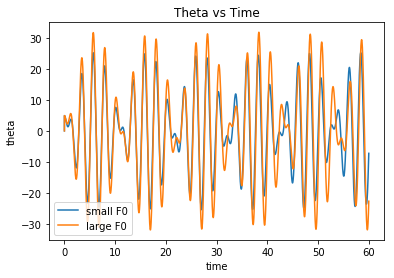

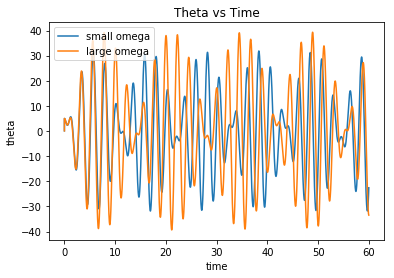

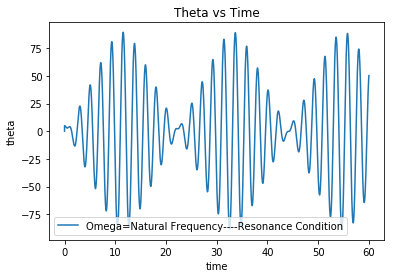

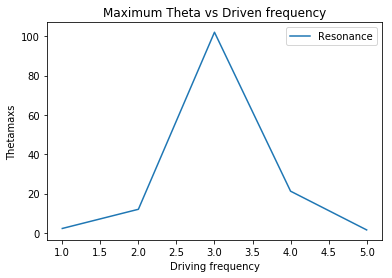

In [188]:
# Problem3: Driven damped Simple Pendulum
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Define a function with variables
def pendulum(L,g,thetaini,q,F0,omega):
    # Initial conditions
    t=0
    a1 = 0
    theta = thetaini*math.pi/180
    dt = 0.001
    t_array = np.array([t])
    theta_array = np.array([theta])
    for i in range(60000):
        #Define Driven damped pendulum condition here
        a2 =  (-g/L) *np.sin(theta) -q*a1+ F0*math.sin((omega)*t)
        a1 +=  a2* dt
        theta  +=  a1*dt
        t+=dt
        t_array = np.append(t_array,t)
        theta_array = np.append(theta_array,theta*180/math.pi)
    return [t_array, theta_array]
# for different Constant F0
[t1,theta1] = pendulum(1,9.8,5,0,0.80,2.5)
[t2,theta2] = pendulum(1,9.8,5,0,1.0,2.5)
plt.plot(t1,theta1,label='small F0')
plt.plot(t2,theta2,label='large F0')
plt.title('Theta vs Time')
plt.legend()
plt.xlabel('time')
plt.ylabel('theta');

# for different omega
plt.figure(2)
[t3,theta3] = pendulum(1,9.8,5,0,1,2.5)
[t4,theta4] = pendulum(1,9.8,5,0,1,2.6)
plt.plot(t3,theta3,label='small omega')
plt.plot(t4,theta4,label='large omega')
plt.title('Theta vs Time')
plt.legend()
plt.xlabel('time')
plt.ylabel('theta');

# for special case ---- omega=natural frequency
plt.figure(3)
[t5,theta5] = pendulum(1,9.8,5,0,1,math.sqrt(9.8))
plt.plot(t5,theta5,label='Omega=Natural Frequency----Resonance Condition')
plt.title('Theta vs Time')
plt.legend()
plt.xlabel('time')
plt.ylabel('theta');

print("As F0 increases, beat amplitude increases but beat period remains same.")
print("As omega increases, beat amplitude and beat period increases.")
print("when omega is equal to natural frequency, we acheive resonace condition.")
# Let us check maximum angle vs driving force
import numpy as np
import matplotlib.pyplot as plt

thetamaxs = []
def pendulum(thetaini,q,F0,omega):
    # Initial conditions
    g=9.8
    l=1
    t=np.linspace(0,60,60000)
    dt = 0.001
    theta=[0]*60000
    a1 = [0]*60000
    a2 = [0]*60000
    theta[0] = thetaini* math.pi/180
    for i in range(1,60000):
        a2[i] =  (-1)*(g/l) *np.sin(theta[i-1])-q*a1[i-1]+ F0*np.sin(((omega))*t[i-1])
        a1[i] =  a1[i-1]+ a2[i]* dt
        theta[i]  = theta[i-1] + a1[i]*dt
        thetamac=np.max(theta[i])
        if abs(theta[i])>np.max(theta[i]):
            thetamac=abs(theta[i])  
        thetamax=thetamac*180/math.pi
    thetamaxs.append(thetamax) 
for z in range(1,6):   
    pendulum(5,0,1,z)
plt.figure(4)
plt.plot(range(1,6),thetamaxs,label='Resonance')
plt.title('Maximum Theta vs Driven frequency')
plt.xlabel('Driving frequency')
plt.ylabel('Thetamaxs')
plt.legend();